In [5]:
from tensorflow import keras
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
# Concat csvs
file_names = ['captcha_labels(0_500).csv' , 'captcha_labels(501_1000).csv' , 'captcha_labels(5000_5251).csv', 'captcha_labels(5252_6001).csv']
combined_df = pd.DataFrame() # Initialize an empty DataFrame
for file in file_names:
    df = pd.read_csv(file)
    combined_df = pd.concat([combined_df, df], ignore_index=True)

image_dir = 'Total_Captcha_Labels'

In [3]:
combined_df.head()

,filename,label0,label1,label2,label3,label4
0,captcha0.png,2,5,6,6,1
1,captcha1.png,5,1,0,9,0
2,captcha10.png,9,0,2,2,9
3,captcha100.png,1,5,4,0,4
4,captcha101.png,8,4,5,2,2


In [4]:
combined_df.value_counts()

filename         label0  label1  label2  label3  label4
captcha999.png   7       9       3       7       6         1
captcha0.png     2       5       6       6       1         1
captcha1.png     5       1       0       9       0         1
captcha984.png   3       0       9       3       8         1
captcha983.png   7       1       1       7       7         1
                                                          ..
captcha103.png   8       4       4       3       6         1
captcha102.png   1       2       5       5       1         1
captcha101.png   8       4       5       2       2         1
captcha1000.png  9       5       3       4       0         1
captcha100.png   1       5       4       0       4         1
Name: count, Length: 2003, dtype: int64

In [5]:
def load_images_and_labels(combined_df, image_dir,num_digits):
    
    X = []
    y = [[] for _ in range(num_digits)]
    
    for idx, row in combined_df.iterrows():
        img_path = os.path.join(image_dir, row['filename'])
        img = keras.preprocessing.image.load_img(img_path, target_size=(img_height, img_width), color_mode='grayscale')
        img = keras.preprocessing.image.img_to_array(img) / 255.0
        X.append(img)
        
        for i in range(num_digits):
            y[i].append(row[f'label{i}'])
            
    X = np.array(X)
    y = [keras.utils.to_categorical(np.array(digit_labels), num_classes=num_classes) for digit_labels in y]
    
    return X, y


num_digits = 5
img_height = 40
img_width = 100
num_classes = 10

X, y = load_images_and_labels(combined_df, image_dir,num_digits)

In [6]:
X.shape

(2003, 40, 100, 1)

In [7]:
X[10]

array([[[1.        ],
        [1.        ],
        [1.        ],
        ...,
        [1.        ],
        [1.        ],
        [1.        ]],

       [[1.        ],
        [0.9764706 ],
        [1.        ],
        ...,
        [0.9764706 ],
        [1.        ],
        [0.9764706 ]],

       [[1.        ],
        [1.        ],
        [0.9764706 ],
        ...,
        [1.        ],
        [1.        ],
        [1.        ]],

       ...,

       [[1.        ],
        [0.9764706 ],
        [1.        ],
        ...,
        [0.9764706 ],
        [1.        ],
        [1.        ]],

       [[1.        ],
        [1.        ],
        [0.88235295],
        ...,
        [1.        ],
        [1.        ],
        [0.9764706 ]],

       [[0.9764706 ],
        [1.        ],
        [1.        ],
        ...,
        [0.88235295],
        [1.        ],
        [1.        ]]], dtype=float32)

In [8]:
y

[array([[0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        ...,
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.]]),
 arr

In [9]:
y[0].shape
# y[4].shape

(2003, 10)

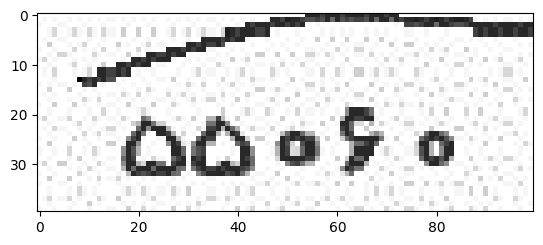

In [10]:
plt.imshow(X[220] , cmap='gray')

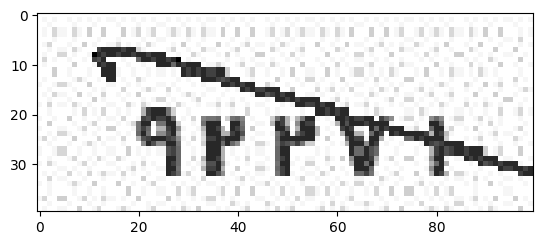

In [11]:
plt.imshow(X[70] , cmap='gray')

In [12]:
from sklearn.model_selection import train_test_split


X_tra, X_test = train_test_split(X, test_size=0.2, random_state=42)


y_tra = []
y_test = []

for digit_labels in y:
    y_tr, y_tes = train_test_split(digit_labels, test_size=0.2, random_state=42)
    y_tra.append(y_tr)
    y_test.append(y_tes)

In [13]:
X_train, X_val = train_test_split(X_tra, test_size=0.2, random_state=42)


y_train = []
y_val = []

for digit_labels in y_tra:
    y_tr, y_v = train_test_split(digit_labels, test_size=0.2, random_state=42)
    y_train.append(y_tr)
    y_val.append(y_v)

In [14]:
X_train.shape

(1281, 40, 100, 1)

In [15]:
X_test.shape

(401, 40, 100, 1)

### Create Model

In [16]:
input_layer = keras.layers.Input(shape=(img_height, img_width, 1))
x = keras.layers.Conv2D(16, 3, activation='relu', padding='same')(input_layer)
x = keras.layers.BatchNormalization()(x)

x = keras.layers.Conv2D(32, 3, activation='relu', padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.MaxPooling2D(2)(x)

x = keras.layers.Conv2D(64, 3, activation='relu', padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.MaxPooling2D(2)(x)

x = keras.layers.Conv2D(128, 3, activation='relu', padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.MaxPooling2D(2)(x)

x = keras.layers.Flatten()(x)
x = keras.layers.Dense(256, activation='relu')(x)
x = keras.layers.Dropout(0.5)(x)

In [17]:
output1 = keras.layers.Dense(num_classes, activation='softmax')(x)
output2 = keras.layers.Dense(num_classes, activation='softmax')(x)
output3 = keras.layers.Dense(num_classes, activation='softmax')(x)
output4 = keras.layers.Dense(num_classes, activation='softmax')(x)
output5 = keras.layers.Dense(num_classes, activation='softmax')(x)

model = keras.models.Model(inputs=input_layer , outputs=[output1, output2, output3, output4, output5])

In [18]:
model.compile(
      optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    loss=['categorical_crossentropy'] * num_digits,
    metrics=['accuracy'] * num_digits
)

In [19]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 40, 100,   │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 40, 100,   │        160 │ input_layer[0][0] │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 40, 100,   │         64 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 40, 100,   │      4,640 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 40, 100,   │        128 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 20, 50,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 20, 50,    │     18,496 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 20, 50,    │        256 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 10, 25,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 10, 25,    │     73,856 │ max_pooling2d_1[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 10, 25,    │        512 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 5, 12,     │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 7680)      │          0 │ max_pooling2d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 256)       │  1,966,336 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 256)       │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 10)        │      2,570 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 10)        │      2,570 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 10)        │      2,570 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 10)        │      2,570 │ dropout[0][0]   

 Total params: 2,077,298 (7.92 MB)

 Trainable params: 2,076,818 (7.92 MB)

 Non-trainable params: 480 (1.88 KB)

In [20]:
# Callbacks:
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True
)

model_ckpt = keras.callbacks.ModelCheckpoint(
    filepath='best_model.keras',
    monitor='val_accuracy',
    save_best_only=True
)

In [21]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=200,
    batch_size=10,
    callbacks = [model_ckpt, early_stop]
)


Epoch 1/200
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - dense_1_accuracy: 0.1404 - dense_1_loss: 2.7883 - dense_2_accuracy: 0.1264 - dense_2_loss: 2.8174 - dense_3_accuracy: 0.1237 - dense_3_loss: 2.9723 - dense_4_accuracy: 0.1239 - dense_4_loss: 2.8146 - dense_5_accuracy: 0.1329 - dense_5_loss: 2.8572 - loss: 14.2499

d:\Programming\Deep_Learning\tf-env\Lib\site-packages\keras\src\callbacks\model_checkpoint.py:302: UserWarning: Can save best model only with val_accuracy available.
  if self._should_save_model(epoch, batch, logs, filepath):


129/129 ━━━━━━━━━━━━━━━━━━━━ 25s 87ms/step - dense_1_accuracy: 0.1406 - dense_1_loss: 2.7854 - dense_2_accuracy: 0.1264 - dense_2_loss: 2.8145 - dense_3_accuracy: 0.1238 - dense_3_loss: 2.9686 - dense_4_accuracy: 0.1239 - dense_4_loss: 2.8117 - dense_5_accuracy: 0.1331 - dense_5_loss: 2.8538 - loss: 14.2342 - val_dense_1_accuracy: 0.1184 - val_dense_1_loss: 3.0724 - val_dense_2_accuracy: 0.1215 - val_dense_2_loss: 2.9358 - val_dense_3_accuracy: 0.0997 - val_dense_3_loss: 3.8988 - val_dense_4_accuracy: 0.1277 - val_dense_4_loss: 2.9242 - val_dense_5_accuracy: 0.0779 - val_dense_5_loss: 3.4988 - val_loss: 16.3341
Epoch 2/200
129/129 ━━━━━━━━━━━━━━━━━━━━ 10s 75ms/step - dense_1_accuracy: 0.2645 - dense_1_loss: 2.0593 - dense_2_accuracy: 0.2179 - dense_2_loss: 2.1563 - dense_3_accuracy: 0.1834 - dense_3_loss: 2.2574 - dense_4_accuracy: 0.1516 - dense_4_loss: 2.2622 - dense_5_accuracy: 0.2333 - dense_5_loss: 2.1492 - loss: 10.8846 - val_dense_1_accuracy: 0.1495 - val_dense_1_loss: 3.0331 - 

### Evaluate and Result Structure:

- For 5 digit:
<br>
Index 1..5 → Loss for each digit
<br>
Index 6..10 → accuracy for each digit

In [22]:
results = model.evaluate(X_test, y_test, batch_size=32)
print("Evaluation results (loss and accuracy for each output):")
for i in range(num_digits):
    loss_i = results[1 + i]              
    acc_i  = results[1 + num_digits + i]
    print(f"Digit {i} | Loss: {loss_i} , Accuracy: {acc_i}")


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - dense_1_accuracy: 1.0000 - dense_1_loss: 0.0011 - dense_2_accuracy: 1.0000 - dense_2_loss: 0.0025 - dense_3_accuracy: 1.0000 - dense_3_loss: 7.6406e-04 - dense_4_accuracy: 1.0000 - dense_4_loss: 0.0021 - dense_5_accuracy: 1.0000 - dense_5_loss: 0.0010 - loss: 0.0075  
Evaluation results (loss and accuracy for each output):
Digit 0 | Loss: 0.0007330211228691041 , Accuracy: 1.0
Digit 1 | Loss: 0.003275386756286025 , Accuracy: 1.0
Digit 2 | Loss: 0.0007991300080902874 , Accuracy: 1.0
Digit 3 | Loss: 0.003223732579499483 , Accuracy: 1.0
Digit 4 | Loss: 0.0011421374510973692 , Accuracy: 1.0


### Predict

In [2]:
def preprocess_image(image_path, img_height=40, img_width=100):
    img = keras.preprocessing.image.load_img(image_path, target_size=(img_height, img_width), color_mode='grayscale')
    img = keras.preprocessing.image.img_to_array(img) / 255.0
    img = np.expand_dims(img, axis=0) 
    return img

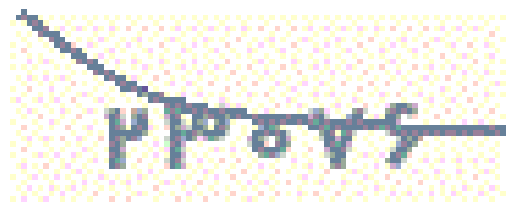

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Predicted captcha: 23076


In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

img = Image.open("test6.png")
plt.imshow(img)
plt.axis("off")
plt.show()

# img address for predict
new_image_path = 'test6.png'
img = preprocess_image(new_image_path, img_height, img_width)

preds = model.predict(img)


# Choose the highest probability
pred_digits = [np.argmax(p, axis=1)[0] for p in preds]


captcha_pred = ''.join(str(d) for d in pred_digits)
print("Predicted captcha:", captcha_pred)